<h1>Reto Minsait Land Classification</h1><br/>
<img src="https://www.cajamardatalab.com/datathon-cajamar-universityhack-2020/retos/predictivo/dos.jpg" width="47%" align="left" style="border-radius: 25px;">
<img src="https://www.cajamardatalab.com/datathon-cajamar-universityhack-2020/retos/predictivo/uno.jpg" width="47%" align="right" style="border-radius: 25px;">

<div style="text-align: right">
<font color="#004D7F" size=3>Equipo: Data Attack</font><br>
<font color="#004D7F" size=3>Miembros: Vanessa Navarro</font><br>
<font color="#004D7F" size=3>Centro: UCLM</font>
</div>

En este cuaderno vamos a leer y visualizar los datos del reto Minsait Land Classification para poder realizar una exploración y análisis del conjunto de datos de modelado y de sus variables relativas al terreno.

Para la realización de este cuaderno, se ha utilizado la plataforma `Kaggle Notebooks`, la cual nos proporciona un entorno de trabajo de una CPU con 4 procesadores y 16GB de memoria RAM. Aún así, todo el cuaderno ha sido después ejecutado en `Jupyter Notebooks` para que las celdas muestren el resultado de su ejecución (al exportar el cuaderno desde la plataforma Kaggle no es así).

[NOTA] Pero hay una excepción: Los resultados con el clasificador `VotingClassifier` (tanto con k=54 como con k=10), no pueden visualizarse debido a la baja potencia de nuestros equipos. Para visualizar los resultados tendríamos que ejecutar el cuaderno en Kaggle. A pesar de ello, escribiremos en una celda de markdown los resultados obtenidos para dicho clasificador.

<a id="indice"></a>
### Índice

* [1. Lectura de los datos](#section1)
* [2. Exploración](#section2)
    * [2.1. Las variables](#section21)
    * [2.2. La clase](#section22)
    * [2.3. Valores perdidos](#section23)
    * [2.4. Correlación entre variables](#section24)
* [3. Preparación de los datos](#section3)
    * [3.1. Variables numéricas](#section31)
        * [3.1.1. Canales R y G](#section311)
        * [3.1.2. Canales B y NIR](#section312)
        * [3.1.3. Resto de variables numéricas](#section313)
        * [3.1.4. Conclusiones sobre las variables numéricas](#section314)
    * [3.2. Variables categóricas](#section32)
    * [3.3. Obtención de conjunto de validación](#section33)
* [4. Pipelines para preprocesamiento](#section4)
* [5. Modelos de clasificación](#section5)
    * [5.1. Árbol de decisión](#section51)
    * [5.2. Random Forest](#section52)
    * [5.3. Vecinos más cercanos](#section53)
    * [5.4. Regresión logística multinomial](#section54)
    * [5.5. VotingClassifier](#section55)
* [6. Selección de variables](#section6)
    * [6.1. Árbol de decisión](#section61)
    * [6.2. Random Forest](#section62)
    * [6.3. Vecinos más cercanos](#section63)
    * [6.4. Regresión logística multinomial](#section64)
    * [6.5. VotingClassifier](#section65)
* [Modelo seleccionado y resultados finales](#section)


Primero importaremos las librerías necesarias y estableceremos la semilla a utilizar para poder reproducir todos nuestros resultados.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Para que las gráficas con pyplot y seaborn 
# tengan la misma estética.
from matplotlib import style
style.use('seaborn')

seed = 0
import warnings
warnings.filterwarnings(action='ignore')

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section1"></a>
<h1>1. Lectura de los datos</h1><br/>
Primero leemos los datos de modelado y estimación, e imprimimos los tamaños de cada uno de ellos.

In [3]:
# df = pd.read_csv('/kaggle/input/modelar-uh2020/Modelar_UH2020.txt', index_col='ID', sep='|')
# df_est = pd.read_csv('/kaggle/input/estimar-uh2020/Estimar_UH2020.txt', index_col='ID', sep='|')
df = pd.read_csv('data/Modelar_UH2020.txt', index_col='ID', sep='|')
df_est = pd.read_csv('data/Estimar_UH2020.txt', index_col='ID', sep='|')

print("Tamaño del conjunto de datos de modelado:  %d viviendas diferentes" % df.shape[0])
print("Tamaño del conjunto de datos de estimación:  %d viviendas diferentes" % df_est.shape[0])
print("Número de variables: %d" % df.shape[1])
df.head()

Tamaño del conjunto de datos de modelado:  103230 viviendas diferentes
Tamaño del conjunto de datos de estimación:  5618 viviendas diferentes
Número de variables: 55


,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section2"></a>
<h1>2. Exploración</h1><br/>
Lo primero que debemos hacer para tratar de conseguir buenos resultados es analizar detenidamente los datos que tenemos. Para ello, analizaremos las variables, sus valores, la distribución de la clase, los valores perdidos que pueda haber, etc.
<a id="section21"></a>
<h2>2.1. Las variables</h2><br/>
Imprimimos las 55 variables de nuestro dataset, además del tipo y el número de valores distintos que puede tomar cada una de ellas.

In [4]:
[(col, df[col].dtypes, str(df[col].nunique()) + ' valores distintos') for col in df.columns]

[('X', dtype('int64'), '103132 valores distintos'),
 ('Y', dtype('int64'), '93969 valores distintos'),
 ('Q_R_4_0_0', dtype('float64'), '141 valores distintos'),
 ('Q_R_4_0_1', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_2', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_3', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_4', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_5', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_6', dtype('float64'), '229 valores distintos'),
 ('Q_R_4_0_7', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_8', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_0_9', dtype('float64'), '230 valores distintos'),
 ('Q_R_4_1_0', dtype('float64'), '229 valores distintos'),
 ('Q_G_3_0_0', dtype('float64'), '172 valores distintos'),
 ('Q_G_3_0_1', dtype('float64'), '230 valores distintos'),
 ('Q_G_3_0_2', dtype('float64'), '229 valores distintos'),
 ('Q_G_3_0_3', dtype('float64'), '230 valores distintos'),
 ('Q_G_3_0_4

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section22"></a>
<h2>2.2. La clase</h2><br/>
Sobre la clase, sabemos que existen 7 tipos de terreno diferentes. Vamos a visualizar su distribución dentro del dataset de modelado.

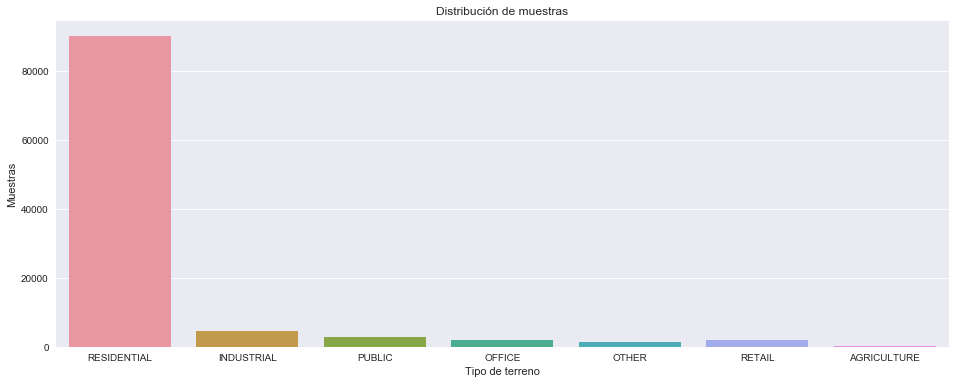

Clases:  ['RESIDENTIAL' 'INDUSTRIAL' 'PUBLIC' 'OFFICE' 'OTHER' 'RETAIL'
 'AGRICULTURE']
El porcentaje de muestras de tipo RESIDENTIAL es 0.87
El porcentaje de muestras de tipo INDUSTRIAL es 0.04
El porcentaje de muestras de tipo PUBLIC es 0.03
El porcentaje de muestras de tipo OFFICE es 0.02
El porcentaje de muestras de tipo OTHER es 0.01
El porcentaje de muestras de tipo RETAIL es 0.02
El porcentaje de muestras de tipo AGRICULTURE es 0.00


In [5]:
plt.figure(figsize=(16, 6))
sns.countplot(x='CLASE', data=df)
plt.title("Distribución de muestras")
plt.xlabel('Tipo de terreno')
plt.ylabel('Muestras')
plt.show()

print("Clases: ", df['CLASE'].unique())
for c in df['CLASE'].unique():
    print(f"El porcentaje de muestras de tipo {c} es {(sum(df['CLASE']==c) / df.shape[0]):.2f}")

Como vemos, el dataset está bastante desbalanceado, a favor de la clase `RESIDENTIAL`. Vamos a visualizar mejor la distribución del resto de tipos de terreno, obviando este primer tipo. Así, vemos que también hay un gran número de terrenos de tipo `INDUSTRIAL`, y muy pocos de tipo `AGRICULTURE`.

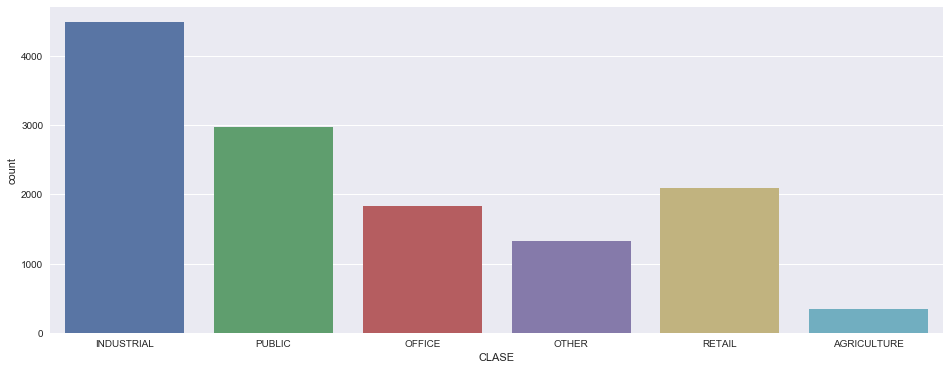

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(x='CLASE', data=df[df['CLASE'] != 'RESIDENTIAL']);

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section23"></a>
<h2>2.3. Valores perdidos</h2>

Además de analizar la clase, también tenemos que ver el número de valores perdidos que tenemos en nuestro dataset. Así, vemos que las únicas variables con valores perdidos son `MAXBUILDINGFLOOR` y `CADASTRALQUALITYID`, con 20 valores perdidos en cada una de ellas respectivamente.

In [7]:
np.sum(df.isna())

X                      0
Y                      0
Q_R_4_0_0              0
Q_R_4_0_1              0
Q_R_4_0_2              0
Q_R_4_0_3              0
Q_R_4_0_4              0
Q_R_4_0_5              0
Q_R_4_0_6              0
Q_R_4_0_7              0
Q_R_4_0_8              0
Q_R_4_0_9              0
Q_R_4_1_0              0
Q_G_3_0_0              0
Q_G_3_0_1              0
Q_G_3_0_2              0
Q_G_3_0_3              0
Q_G_3_0_4              0
Q_G_3_0_5              0
Q_G_3_0_6              0
Q_G_3_0_7              0
Q_G_3_0_8              0
Q_G_3_0_9              0
Q_G_3_1_0              0
Q_B_2_0_0              0
Q_B_2_0_1              0
Q_B_2_0_2              0
Q_B_2_0_3              0
Q_B_2_0_4              0
Q_B_2_0_5              0
Q_B_2_0_6              0
Q_B_2_0_7              0
Q_B_2_0_8              0
Q_B_2_0_9              0
Q_B_2_1_0              0
Q_NIR_8_0_0            0
Q_NIR_8_0_1            0
Q_NIR_8_0_2            0
Q_NIR_8_0_3            0
Q_NIR_8_0_4            0


Además, podemos observar que si la vivienda tiene una de las variables a NaN, la otra variable también aparece como valor perdido.

In [8]:
print(df['CADASTRALQUALITYID'].unique())
print(df['MAXBUILDINGFLOOR'].unique())
np.array_equal(df[df['CADASTRALQUALITYID'].isna()].index, df[df['MAXBUILDINGFLOOR'].isna()].index)

['2' '8' '5' '6' '4' '7' '3' 'C' '1' '9' 'B' 'A' nan]
[ 0.  1.  8.  4.  7.  2.  5.  3. 11.  9.  6. 12. 16. 10. 25. 13. 14. 22.
 15. 17. 24. 19. 23. 18. 21. nan 20.]


True

Por tanto, un primer paso en la preparación de los datos que podemos hacer, sería eliminar esas 20 filas en las que los valores de las variables `CADASTRALQUALITYID` y `MAXBUILDINGFLOOR` son NaN. Dado el tamaño del dataset, es posible trabajar con el dataframe sin esos valores perdidos. Tendríamos así un dataframe de 103210 filas.

In [9]:
df.dropna(inplace=True)
df.shape

(103210, 55)

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section24"></a>
<h2>2.4. Correlación entre variables</h2>

Otra cosa que podemos analizar son las posibles correlaciones que existen entre las variables. Si visualizamos esta matriz de correlación, vemos que todas las variables relacionadas con el color de la banda (`R,G,B,NIR`) están correlacionadas entre sí. Como apunte, cabe destacar que la variable `Q_R_4_1_0` se relaciona con la variable `Q_G_3_1_0` y `Q_NIR_8_1_0`. Además, las variables `GEOM_R2` y `GEOM_R3` también están correlacionadas positivamente.

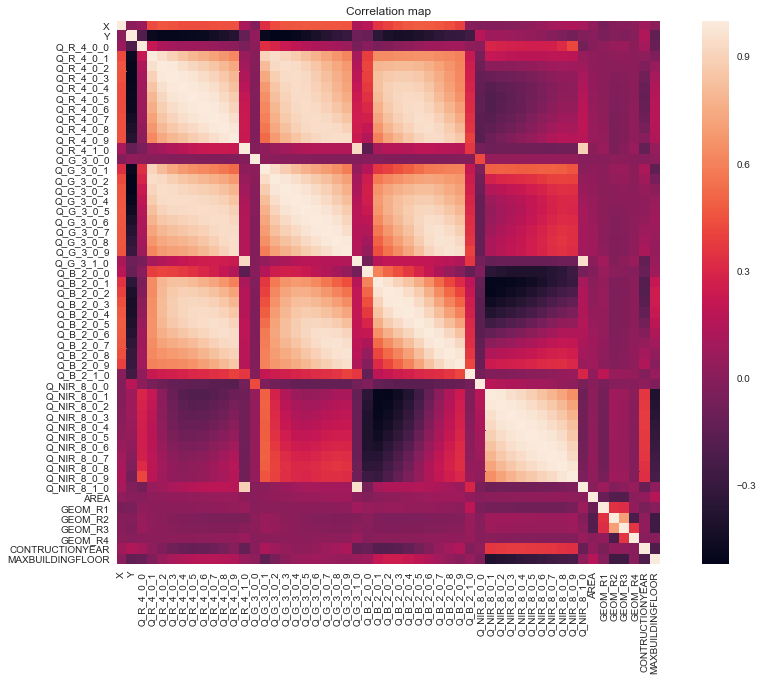

In [10]:
corrmat = df.corr(method='pearson')

# Mapa de calor con seaborn
plt.figure(figsize=(15,10))
#
# COMPLETAR
#
sns.heatmap(corrmat, square=True)

plt.title("Correlation map")
plt.show()

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section3"></a>
<h1>3. Preparación de los datos</h1><br/>
Una vez eliminados los valores perdidos de nuestro dataset de modelado, vamos a dividir las variables en categóricas y numéricas.

In [11]:
cat_features = [col for col in df.columns if df[col].dtype == 'O']
num_features = [col for col in df.columns if df[col].dtype != 'O']

cat_features.remove('CLASE')

print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

Variables numéricas: 
['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']

Variables categóricas
['CADASTRALQUALITYID']


<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section31"></a>
<h2>3.1. Variables numéricas</h2><br/>
Puede resultar de interés llevar a cabo una pequeña exploración de algunas de las variables numéricas para ver tanto sus distribuciones como su relación con la clase. Primero veremos las distribuciones de las 40 variables numéricas relacionadas con los canales R, G, B y NIR.

<a id="section311"></a>
<h3>3.1.1. Canales R y G</h3>

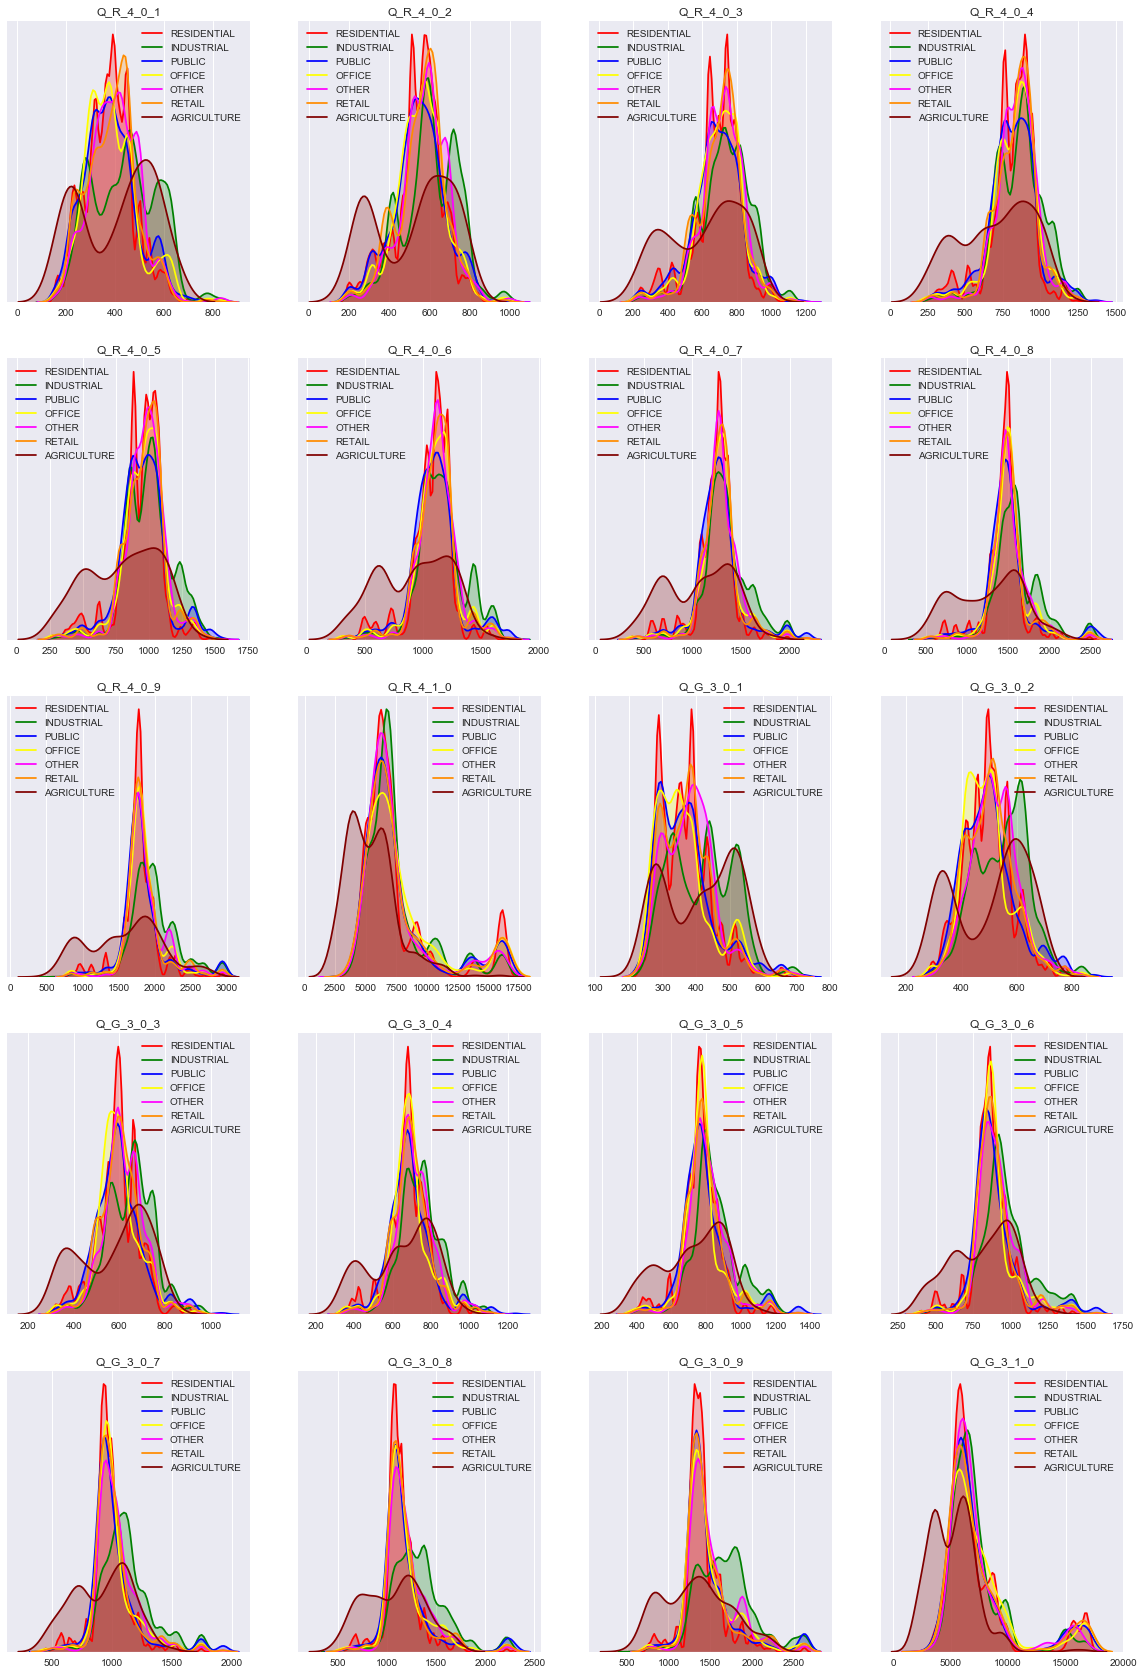

In [12]:
fig, axs = plt.subplots(5, 4, figsize=(20, 30))
R_G_features = ['Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0']

for col, ax in enumerate(axs.flatten()):
    col_name = R_G_features[col]
    sns.kdeplot(data=df[df['CLASE']=='RESIDENTIAL'][col_name], ax=ax, label='RESIDENTIAL', color='red', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='INDUSTRIAL'][col_name], ax=ax, label='INDUSTRIAL', color='green', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='PUBLIC'][col_name], ax=ax, label='PUBLIC', color='blue', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OFFICE'][col_name], ax=ax, label='OFFICE', color='yellow', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OTHER'][col_name], ax=ax, label='OTHER', color='magenta', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='RETAIL'][col_name], ax=ax, label='RETAIL', color='darkorange', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='AGRICULTURE'][col_name], ax=ax, label='AGRICULTURE', color='maroon', shade=True)
    
    ax.set_title(col_name);    
    ax.set_yticks([])

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section312"></a>
<h3>3.1.2. Canales B y NIR</h3>

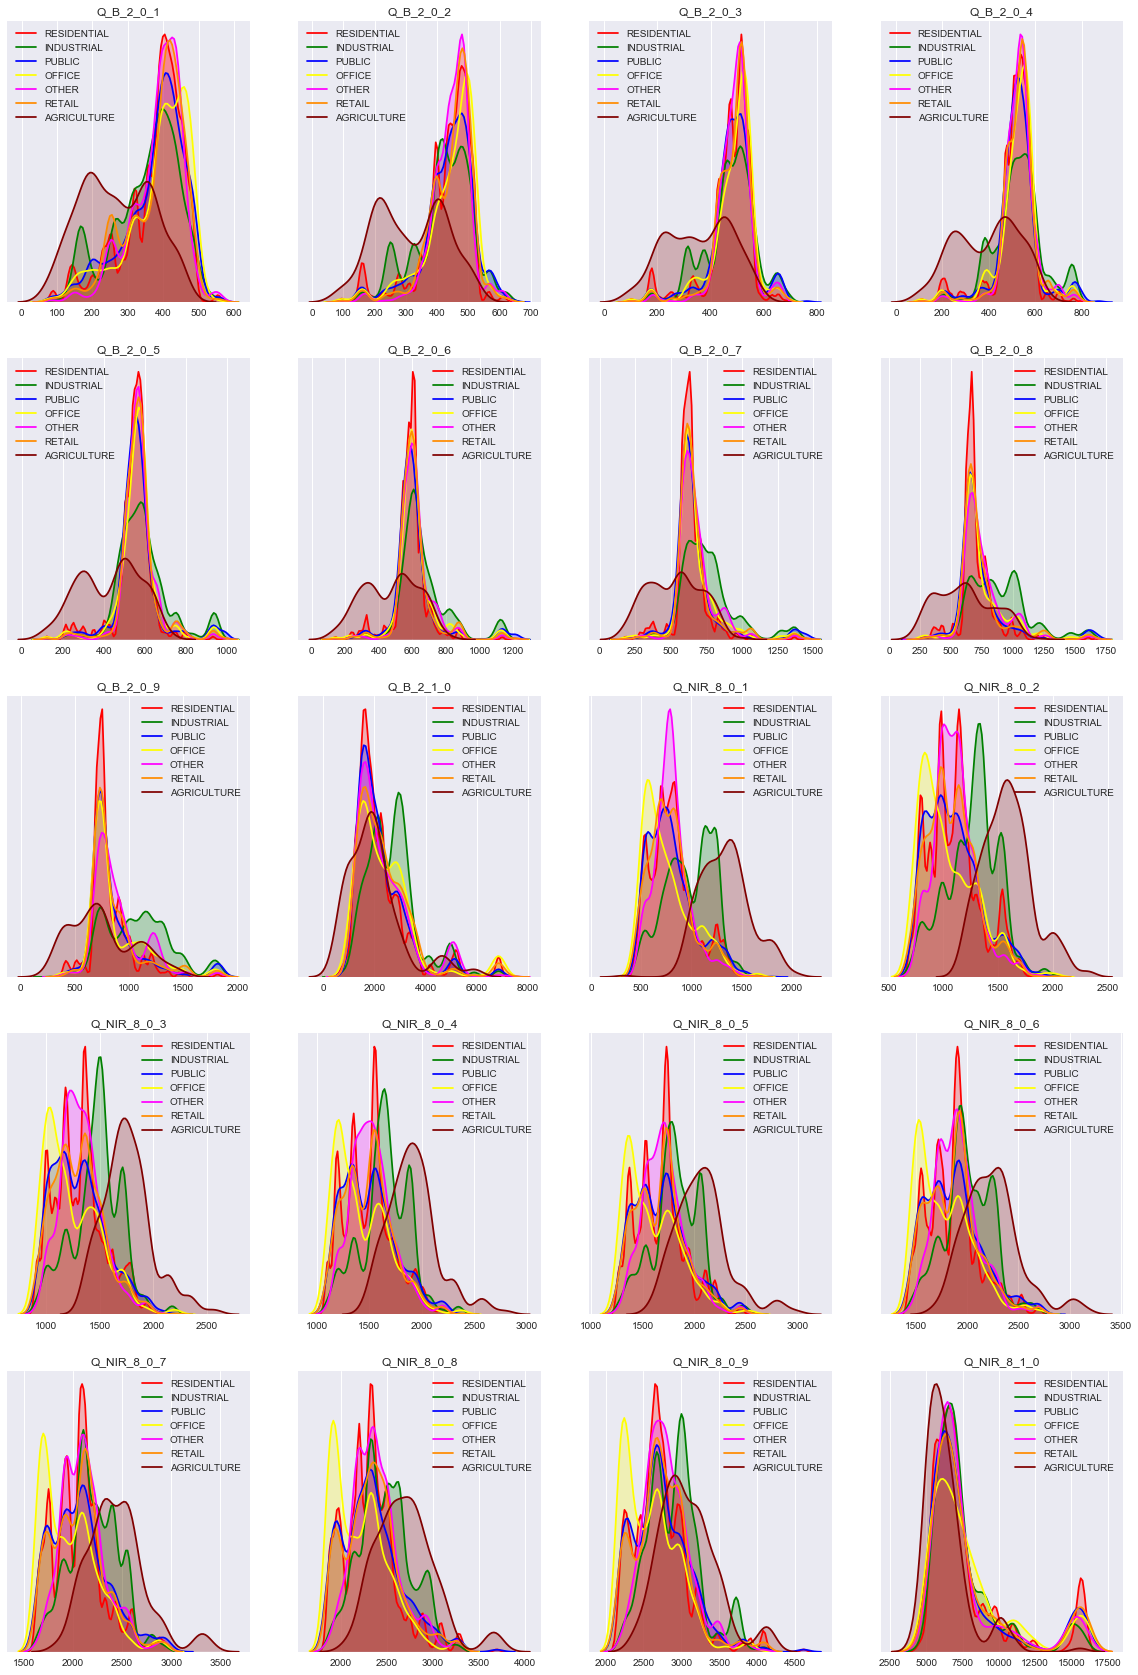

In [13]:
fig, axs = plt.subplots(5, 4, figsize=(20,30))
B_NIR_features = ['Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0']

for col, ax in enumerate(axs.flatten()):
    col_name = B_NIR_features[col]
    sns.kdeplot(data=df[df['CLASE']=='RESIDENTIAL'][col_name], ax=ax, label='RESIDENTIAL', color='red', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='INDUSTRIAL'][col_name], ax=ax, label='INDUSTRIAL', color='green', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='PUBLIC'][col_name], ax=ax, label='PUBLIC', color='blue', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OFFICE'][col_name], ax=ax, label='OFFICE', color='yellow', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OTHER'][col_name], ax=ax, label='OTHER', color='magenta', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='RETAIL'][col_name], ax=ax, label='RETAIL', color='darkorange', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='AGRICULTURE'][col_name], ax=ax, label='AGRICULTURE', color='maroon', shade=True)
    
    ax.set_title(col_name);    
    ax.set_yticks([])

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section313"></a>
<h3>3.1.3. Resto de variables numéricas</h3>

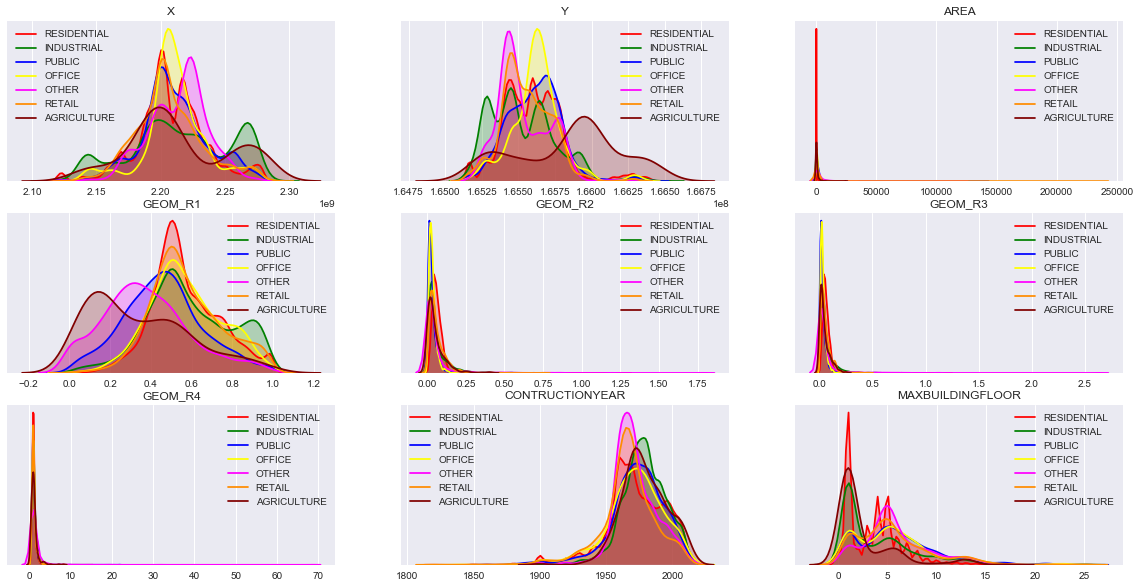

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
rest_num_features = ['X', 'Y', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']

for col, ax in enumerate(axs.flatten()):
    col_name = rest_num_features[col]
    sns.kdeplot(data=df[df['CLASE']=='RESIDENTIAL'][col_name], ax=ax, label='RESIDENTIAL', color='red', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='INDUSTRIAL'][col_name], ax=ax, label='INDUSTRIAL', color='green', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='PUBLIC'][col_name], ax=ax, label='PUBLIC', color='blue', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OFFICE'][col_name], ax=ax, label='OFFICE', color='yellow', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='OTHER'][col_name], ax=ax, label='OTHER', color='magenta', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='RETAIL'][col_name], ax=ax, label='RETAIL', color='darkorange', shade=True)
    sns.kdeplot(data=df[df['CLASE']=='AGRICULTURE'][col_name], ax=ax, label='AGRICULTURE', color='maroon', shade=True)
    
    ax.set_title(col_name);    
    ax.set_yticks([])

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section314"></a>
<h3>3.1.4. Conclusiones sobre las variables numéricas</h3>

Como conclusiones, podemos destacar lo siguiente:
* Las variables de los canales indican mayoritariamente que, si su valor se acerca aproximadamente a la media de dicha variable, la clase será `RESIDENTIAL`, que es la clase mayoritaria del dataset, por lo que esto no nos dice mucho.
* Sobre las variables `X` e `Y`, podemos observar que si sus valores indican más o menos el centro de la zona del municipio de Madrid, el tipo de terreno será `OFFICE`, mientras que a las afueras tendremos terrenos de tipo `INDUSTRIAL` o `AGRICULTURE`.
* Respecto a la variable `AREA`, podríamos decir que si esta es muy grande, el tipo de terreno será casi con total seguridad, `RETAIL`, posiblemente debido a los centros comerciales de gran superficie.
* Sobre las variables `GEOM_R2`y `GEOM_R3`, si sus valores son muy bajos, se tratará de terreno de tipo `PUBLIC` o `OFFICE`, mientras que si es muy elevado, se tratará de terrenos de tipo `OTHER`.
* El año de construcción de los edificios del entorno (`CONTRUCTIONYEAR`) nos dice que, si su valor está entre los años 60 y 70, puede que se trate de terrenos de tipo `OTHER` o `RETAIL`. Los edificios más viejos están en terrenos de tipo `RETAIL` sobretodo.
* El número máximo de plantas de los edificios del entorno (`MAXBUILDINGFLOOR`) indica claramente que si su valor es cero, el terreno será `AGRICULTURE`, mientras que si su valor es muy elevado, se tratará de terrenos de tipo `RETAIL` o `PUBLIC`.

A continuación describiremos los valores máximos, mínimos, medios, y percentiles de las variables numéricas.

In [15]:
df[R_G_features].describe()

,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0
count,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000
mean,382.592440,548.622550,683.985652,811.028521,939.957263,1080.110962,1242.829134,1455.148519,1790.150107,7416.894748,369.745641,498.520310,596.412176,685.665781,775.352823,873.847465,992.304814,1153.062577,1428.620823,7237.818715
std,99.430383,121.419009,137.755358,153.486718,169.552153,186.431956,207.005864,234.820752,269.395209,3039.621121,75.826195,87.010829,95.872246,105.791042,118.142620,134.796943,159.552559,196.798414,247.721002,3023.269909
min,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,459.001373,591.000671,2337.124724,215.999632,274.000061,298.999237,324.999908,364.998383,394.999756,430.000412,485.999817,565.999786,1762.864682
25%,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,1378.988965,1691.304590,5745.113586,303.999902,440.003516,544.999170,640.998657,724.995758,814.999817,921.001099,1055.001587,1302.499023,5595.960225
50%,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,1479.002441,1783.003601,6449.615547,363.002579,495.997705,597.001514,684.000488,769.000488,864.000793,975.997986,1120.999146,1382.994275,6214.232925
75%,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,1550.000244,1884.999426,7376.529218,411.002393,559.003418,661.000879,746.001318,832.999512,938.011230,1054.000854,1223.605518,1528.998401,7840.591110
max,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,2575.792188,2940.000635,16316.530592,720.000836,885.999023,1057.998584,1240.000488,1374.999939,1572.000073,1928.001306,2289.009375,2621.999146,16899.629716


In [16]:
df[B_NIR_features].describe()

,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0
count,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000
mean,372.398364,431.142551,473.390095,511.065261,549.112340,591.008850,641.268529,709.514836,825.742527,2255.311321,814.150888,1102.493346,1315.637712,1499.810133,1676.325216,1859.915441,2066.533837,2328.268678,2738.527118,7748.575833
std,86.823275,84.479231,85.652921,89.020050,94.587322,105.223838,125.312166,155.078011,201.351897,1048.574995,228.163887,234.583790,234.770343,235.368412,239.662751,248.074725,264.251355,295.781185,365.753950,2795.957174
min,84.000022,95.000000,102.000000,110.000031,121.999889,141.000015,182.000060,234.999832,256.999969,493.696267,328.703671,700.003967,914.001007,1099.995972,1264.005249,1435.997559,1632.993774,1861.006226,2172.992676,4085.049076
25%,323.500137,398.000000,451.000061,481.999969,523.000153,551.999939,591.999579,640.000061,715.999817,1578.547045,649.703033,952.999451,1151.004639,1336.003833,1513.998901,1692.994263,1878.997437,2126.002441,2478.998193,6051.309064
50%,396.000089,452.000000,491.000034,524.999756,558.000183,600.000122,632.000531,670.999939,759.999939,1957.171756,782.505676,1088.002075,1328.011536,1525.002368,1700.000305,1873.000610,2067.002441,2313.999268,2688.000000,6798.207198
75%,431.505035,488.000000,522.999878,558.999939,591.000000,618.999939,684.000336,767.000000,904.001398,2697.757756,935.499146,1222.998193,1436.998584,1628.998413,1808.002502,1978.989258,2194.001978,2491.004199,2940.996704,8033.479864
max,559.000000,646.000330,762.000122,872.000000,987.501190,1213.000000,1445.699915,1664.000195,1839.999512,7337.436962,2055.998657,2324.008301,2579.501465,2801.996582,2983.994995,3158.000488,3408.002808,3750.997559,4614.998535,15848.608811


In [17]:
df[rest_num_features].describe()

,X,Y,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032100e+05,1.032100e+05,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000,103210.000000
mean,2.208851e+09,1.655956e+08,439.642443,0.563395,0.062489,0.061862,1.074332,1972.552921,3.766709
std,2.751413e+07,2.039603e+05,1839.272911,0.174097,0.042848,0.042295,0.541150,22.337780,2.944896
min,2.120751e+09,1.651350e+08,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194230e+09,1.654516e+08,97.472983,0.455232,0.038256,0.038168,0.801370,1960.000000,1.000000
50%,2.205979e+09,1.655908e+08,171.532091,0.536363,0.055804,0.055036,0.997180,1972.000000,4.000000
75%,2.224099e+09,1.657138e+08,343.472636,0.674773,0.078488,0.078064,1.223502,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section32"></a>
<h2>3.2. Variables categóricas</h2>

Sobre las variables no numéricas, si quitamos la clase, solo nos quedaría `CADASTRALQUALITYID`, la cual representa la calidad según los datos de catastro con la siguiente ordenación: de MAYOR a MENOR CALIDAD: A > B > C > 1 > 2 > 3 >...> 8 > 9. Mostraremos la distribución de esta variable dentro de nuestro dataset de modelado. 

Para ello, primero vamos a ordenar la variable categórica de acuerdo a las especificaciones.

In [18]:
df['CADASTRALQUALITYID'] = pd.Categorical(df['CADASTRALQUALITYID'], categories=['A','B','C','1','2','3','4','5','6','7','8','9'], ordered=True)

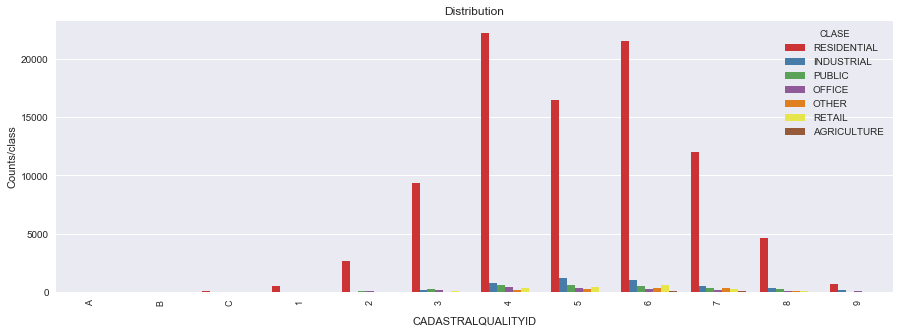

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x="CADASTRALQUALITYID", data=df, hue='CLASE', palette="Set1")

plt.title("Distribution")
plt.xticks(rotation=90, fontsize=9)
plt.xlabel('CADASTRALQUALITYID', labelpad=10)
plt.ylabel('Counts/class')
plt.show()

Como imaginábamos, la clase `RESIDENTIAL` desbalanceada no nos deja ver la información relativa al resto de clases, por lo que vamos a volver a ver la distribución sin tener dicha clase en cuenta.

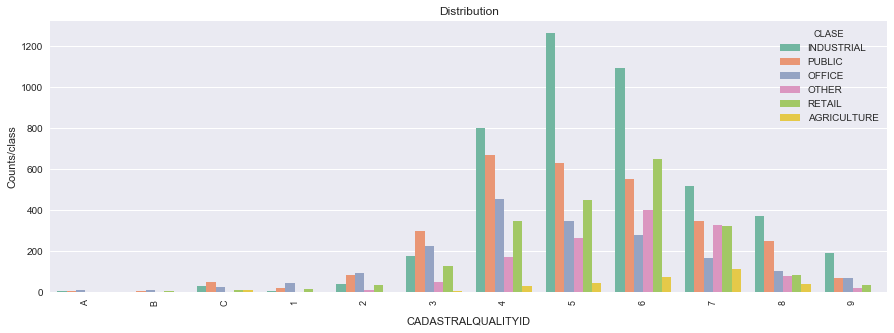

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x="CADASTRALQUALITYID", data=df[df['CLASE'] != 'RESIDENTIAL'], hue='CLASE', palette="Set2")

plt.title("Distribution")
plt.xticks(rotation=90, fontsize=9)
plt.xlabel('CADASTRALQUALITYID', labelpad=10)
plt.ylabel('Counts/class')
plt.show()

Como se puede observar, las viviendas de mayor calidad serán sobretodo de tipo `PUBLIC` y `OFFICE`, mientras que las de menor calidad catastral serán de tipo `INDUSTRIAL` mayoritariamente.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section33"></a>
<h2>3.3. Obtención de dataset de validación</h2><br/>
Para probar los resultados obtenidos con el dataset de modelado, vamos a separarlo en train y val. El conjunto de validación lo vamos a sacar con un proceso simple de holdout, dejando un 85% de los casos para el train, y un 25% para el conjunto de validación.

In [21]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Desordenar los datos
df_model = df.sample(frac=1, random_state=0)
# Copia los datos de test.
df_model_val = df.iloc[training_size:].copy()
# Copia los datos para el entrenamiento del modelo.
df_model = df_model.iloc[:training_size].copy()

print(f'Shape de train: {df_model.shape}')
print(f'Shape de val: {df_model_val.shape}')

Shape de train: (87728, 55)
Shape de val: (15482, 55)


También vamos a separar los conjuntos de train y val en atributos y clase, para poder proceder mejor a la hora de entrenar nuestros modelos de scikit-learn.

In [73]:
X = df_model.drop('CLASE',1)
y = df_model['CLASE']

X_new = df_model_val.drop('CLASE',1)
y_new = df_model_val['CLASE']

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section4"></a>

<h1>4. Pipelines para preprocesamiento</h1>

El primer paso en la creación del Pipeline consiste en la transformación de los datos. Uno de los problemas con los que tradicionalmente se ha lidiado en este sentido, es que se han de tratar de manera separada los datos de distintas columnas, que luego han de ser unidas.

El preprocesamiento para todas las variables de un mismo tipo será similar, por lo que serán sometidas a la misma secuencia de transformaciónes mediante un Pipeline. En primer lugar, se va a definir el proceso de transformación para las variables numéricas, que consistirá en:
* Imputación de valores perdidos (`SimpleImputer`) por la media.
* Normalización a media cero y desviación uno (`StandardScaler`).
* Para las variables categóricas usaremos un `OneHotEncoder` para transformar las etiquetas a binarias.

Con estos pipelines podemos utilizar un `ColumnTransformer` para tratar cada columna por separado.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [25]:
from sklearn.compose import ColumnTransformer
features_transformer = ColumnTransformer([('num', num_transformer, num_features), 
                                          ('cat', cat_transformer, cat_features)])

Además de los pipelines, vamos a crear una fnción para mostrar los resultados obtenidos con el entrenamiento de nuestros modelos de clasificación. Mostraremos matrices de confusión, además de accuracy y precision.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix

def show_results(y, y_pred):
    print(f'accuracy_score: {accuracy_score(y, y_pred)}')
    print(f"precision_score (weighted): {precision_score(y, y_pred, average='weighted')}")
    print('----------')
    labels = y.unique()
    c_mat = multilabel_confusion_matrix(y, y_pred, labels=y.unique())
    precisions = precision_score(y, y_pred, average=None)
    for i in range(0, len(labels)):
        print(labels[i])
        print(c_mat[i])
        print(f'precision_score: {precisions[i]}')

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section5"></a>
<h1>5. Modelos de clasificación</h1><br/>
Una vez analizado el dataset de modelado, pasamos a probar diferentes algoritmos de clasificación.

<a id="section51"></a>
<h2>5.1. Árbol de decisión</h2>

Para este clasificador usaremos `GridSearchCV` para encontrar la mejor combinación de hiperparámetros disponible.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=seed)

features_pipe_tree = Pipeline([('prep', features_transformer),
                               ('clas', dt_model)])

In [28]:
parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__max_depth'] = [5, 7, 10, 15]
parameters['clas__class_weight'] = [None, 'balanced']

GS = GridSearchCV(estimator=features_pipe_tree, param_grid=parameters, scoring='precision_weighted', cv=5)
GS.fit(X, y)

print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)

features_pipe_tree = GS.best_estimator_

Mejor score:  0.8716015375770315
Mejore configuración de parámetros:  {'clas__class_weight': 'balanced', 'clas__max_depth': 10, 'prep__num__imputer__strategy': 'mean'}


In [29]:
print('Resultados train:')
y_pred = features_pipe_tree.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.6648960423126026
precision_score (weighted): 0.8840711728427516
----------
RESIDENTIAL
[[ 9744  1315]
 [24745 51924]]
precision_score: 0.41774193548387095
INDUSTRIAL
[[80877  3029]
 [ 1520  2302]]
precision_score: 0.43181391858938284
OTHER
[[84088  2529]
 [  307   804]]
precision_score: 0.10842040565457899
PUBLIC
[[78519  6675]
 [ 1168  1366]]
precision_score: 0.24122412241224123
OFFICE
[[78918  7253]
 [  675   882]]
precision_score: 0.16987936823778138
RETAIL
[[77718  8236]
 [  981   793]]
precision_score: 0.9753000619846354
AGRICULTURE
[[87106   361]
 [    2   259]]
precision_score: 0.08782810942518551


In [30]:
print('Resultados val:')
y_pred_new = features_pipe_tree.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.6636093527967962
precision_score (weighted): 0.8810373717870801
----------
RESIDENTIAL
[[1710  254]
 [4322 9196]]
precision_score: 0.4732142857142857
RETAIL
[[13727  1436]
 [  177   142]]
precision_score: 0.42473118279569894
INDUSTRIAL
[[14266   535]
 [  286   395]]
precision_score: 0.0936356986100951
PUBLIC
[[13847  1210]
 [  214   211]]
precision_score: 0.2387820512820513
AGRICULTURE
[[15364    59]
 [    6    53]]
precision_score: 0.14848698099929628
OFFICE
[[13981  1239]
 [  134   128]]
precision_score: 0.9731216931216932
OTHER
[[14789   475]
 [   69   149]]
precision_score: 0.08998732572877059


Vemos que tanto en train como en val, la precisión es de 0.88 aproximadamente. También vemos que la mejor combinación de hiperparámetros obtenida ha sido `class_weight='balanced'`y `clas__max_depth=10`. 

Ahora vamos a predecir el test y obtener la clase para cada uno de los casos que componen dicho dataset.

In [50]:
y_pred_est = features_pipe_tree.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__tree.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__tree.txt', index=None, sep='|')

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section52"></a>
<h2>5.2. Random Forest</h2>

Ahora probaremos un nuevo estimador, de tipo `ensemble`: `RandomForestClassifier`.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=seed, max_depth=30, n_jobs=-1)

In [35]:
features_pipe_rf = Pipeline([('prep', features_transformer),
                             ('clas', rf_model)])
features_pipe_rf = features_pipe_rf.fit(X, y)

In [36]:
print('Resultados train:')
y_pred = features_pipe_rf.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.9815908261900419
precision_score (weighted): 0.9819706076997129
----------
RESIDENTIAL
[[ 9444  1615]
 [    0 76669]]
precision_score: 1.0
INDUSTRIAL
[[83906     0]
 [  355  3467]]
precision_score: 1.0
OTHER
[[86617     0]
 [   99  1012]]
precision_score: 1.0
PUBLIC
[[85194     0]
 [  358  2176]]
precision_score: 1.0
OFFICE
[[86171     0]
 [  296  1261]]
precision_score: 1.0
RETAIL
[[85954     0]
 [  504  1270]]
precision_score: 0.9793699862040774
AGRICULTURE
[[87467     0]
 [    3   258]]
precision_score: 1.0


In [37]:
print('Resultados val:')
y_pred_new = features_pipe_rf.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.969190027128278
precision_score (weighted): 0.9690710617377594
----------
RESIDENTIAL
[[ 1542   422]
 [   15 13503]]
precision_score: 0.9814814814814815
RETAIL
[[15162     1]
 [  114   205]]
precision_score: 0.9648829431438127
INDUSTRIAL
[[14780    21]
 [  104   577]]
precision_score: 0.9340659340659341
PUBLIC
[[15041    16]
 [  113   312]]
precision_score: 0.9788359788359788
AGRICULTURE
[[15422     1]
 [    6    53]]
precision_score: 0.9512195121951219
OFFICE
[[15208    12]
 [   92   170]]
precision_score: 0.9696947935368043
OTHER
[[15260     4]
 [   33   185]]
precision_score: 0.9951456310679612


In [51]:
y_pred_est = features_pipe_rf.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__rf.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__rf.txt', index=None, sep='|')

Vemos que los resultados son extremadamente buenos... Tan buenos que sospechamos que el clasificador haya sobreajustado demasiado a los datos de entrenamiento, por lo que seguiremos probando otros modelos para intentar sacar unos resultados más fiables.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section53"></a>
<h2>5.3. Vecinos más cercanos</h2>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(metric='manhattan', n_jobs=-1)

features_pipe_knn = Pipeline([('prep', features_transformer),
                              ('clas', knn_model)])

features_pipe_knn = features_pipe_knn.fit(X, y)

In [42]:
print('Resultados train:')
y_pred = features_pipe_knn.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.923000638336677
precision_score (weighted): 0.9114192864822243
----------
RESIDENTIAL
[[ 5982  5077]
 [  541 76128]]
precision_score: 0.7489711934156379
INDUSTRIAL
[[83207   699]
 [ 1235  2587]]
precision_score: 0.7872793670115642
OTHER
[[86448   169]
 [  615   496]]
precision_score: 0.6084656084656085
PUBLIC
[[84855   339]
 [ 1781   753]]
precision_score: 0.7458646616541353
OFFICE
[[85875   296]
 [ 1097   460]]
precision_score: 0.6895604395604396
RETAIL
[[85840   114]
 [ 1407   367]]
precision_score: 0.9374792192598977
AGRICULTURE
[[87406    61]
 [   79   182]]
precision_score: 0.762993762993763


In [43]:
print('Resultados val:')
y_pred_new = features_pipe_knn.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.9190673039658959
precision_score (weighted): 0.9046204538851409
----------
RESIDENTIAL
[[ 1050   914]
 [  112 13406]]
precision_score: 0.8666666666666667
RETAIL
[[15140    23]
 [  254    65]]
precision_score: 0.765704584040747
INDUSTRIAL
[[14663   138]
 [  230   451]]
precision_score: 0.5
PUBLIC
[[14983    74]
 [  314   111]]
precision_score: 0.7153284671532847
AGRICULTURE
[[15417     6]
 [   20    39]]
precision_score: 0.6
OFFICE
[[15161    59]
 [  203    59]]
precision_score: 0.9361731843575419
OTHER
[[15225    39]
 [  120    98]]
precision_score: 0.7386363636363636


In [52]:
y_pred_est = features_pipe_knn.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__knn.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__knn.txt', index=None, sep='|')

Con este estimador hemos conseguido unos buenos resultados tanto en el train como en la validación (precision de 0.91 aproximadamente). 

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section54"></a>
<h2>5.4. Regresión logística multinomial</h2>

Para el algoritmo de regresión logística es necesario que establezcamos los hiperparámetros `multi_class='multinomial'` y `solver ='newton-cg'`, ya que nuestro problema de clasificación es multiclase.

In [75]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(multi_class='multinomial', solver ='newton-cg', random_state=seed, n_jobs=-1)

features_pipe_lg = Pipeline([('prep', features_transformer),
                             ('clas', lg_model)])

features_pipe_lg = features_pipe_lg.fit(X, y)

In [76]:
print('Resultados train:')
y_pred = features_pipe_lg.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.8881200984862302
precision_score (weighted): 0.8441603131694538
----------
RESIDENTIAL
[[ 2607  8452]
 [  426 76243]]
precision_score: 0.6729559748427673
INDUSTRIAL
[[83307   599]
 [ 2733  1089]]
precision_score: 0.6451421800947867
OTHER
[[86486   131]
 [  981   130]]
precision_score: 0.3515151515151515
PUBLIC
[[84733   461]
 [ 2251   283]]
precision_score: 0.49808429118773945
OFFICE
[[86064   107]
 [ 1499    58]]
precision_score: 0.3803763440860215
RETAIL
[[85941    13]
 [ 1771     3]]
precision_score: 0.9002066237676368
AGRICULTURE
[[87415    52]
 [  154   107]]
precision_score: 0.1875


In [77]:
print('Resultados val:')
y_pred_new = features_pipe_lg.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.8862550058132024
precision_score (weighted): 0.843726567009346
----------
RESIDENTIAL
[[  464  1500]
 [   91 13427]]
precision_score: 0.8823529411764706
RETAIL
[[15161     2]
 [  318     1]]
precision_score: 0.5884244372990354
INDUSTRIAL
[[14673   128]
 [  498   183]]
precision_score: 0.34615384615384615
PUBLIC
[[14976    81]
 [  374    51]]
precision_score: 0.40816326530612246
AGRICULTURE
[[15419     4]
 [   29    30]]
precision_score: 0.38636363636363635
OFFICE
[[15203    17]
 [  253     9]]
precision_score: 0.8995109533060897
OTHER
[[15235    29]
 [  198    20]]
precision_score: 0.3333333333333333


In [78]:
y_pred_est = features_pipe_lg.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__lg.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__lg.txt', index=None, sep='|')

Vemos que los resultados para este clasificador no son muy buenos (precision de 0.84 aproximadamente tanto en train como en val) en comparación con algunos probados anteriormente (KNN por ejemplo).

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section55"></a>
<h2>5.5. VotingClassifier</h2>

Ahora vamos a probar otro tipo de ensemble, `VotingClassifier`, usando como estimadores base los 2 algoritmos que mejores resultados nos dieron: KNN y Random Forest. 

Para su entrenamiento, este algoritmo requiere de una capacidad de procesamiento superior a la que disponemos en nuestros ordenadores, por lo que la ejecución de este algoritmo de clasificación la hemos realizado a través de la plataforma Kaggle.

In [ ]:
from sklearn.ensemble import VotingClassifier

vote_model = VotingClassifier(
    estimators=[
        ('knn', knn_model), 
        ('rf', rf_model)
    ], 
    voting='hard',
    n_jobs=-1
)

features_pipe_vote = Pipeline([('prep', features_transformer),
                               ('clas', vote_model)])

features_pipe_vote = features_pipe_vote.fit(X, y)

In [ ]:
print('Resultados train:')
y_pred = features_pipe_vote.predict(X)
show_results(y, y_pred)

RESULTADOS TRAIN:
```
accuracy_score: 0.9593744300565384
precision_score (weighted): 0.9596175396998328
----------
RESIDENTIAL
[[ 8815  2244]
 [  508 76161]]
precision_score: 0.8087774294670846
INDUSTRIAL
[[83226   680]
 [  361  3461]]
precision_score: 0.8357884568944699
OTHER
[[86481   136]
 [  166   945]]
precision_score: 0.8190401258851299
PUBLIC
[[84981   213]
 [  582  1952]]
precision_score: 0.8741905642923219
OFFICE
[[85941   230]
 [  516  1041]]
precision_score: 0.9016166281755197
RETAIL
[[85954     0]
 [ 1428   346]]
precision_score: 0.971379376315286
AGRICULTURE
[[87406    61]
 [    3   258]]
precision_score: 1.0
```

In [ ]:
print('Resultados val:')
y_pred_new = features_pipe_vote.predict(X_new)
show_results(y_new, y_pred_new)

RESULTADOS VAL:
```
accuracy_score: 0.9487146363518926
precision_score (weighted): 0.9473516468363811
----------
RESIDENTIAL
[[ 1455   509]
 [  116 13402]]
precision_score: 0.9016393442622951
RETAIL
[[15162     1]
 [  255    64]]
precision_score: 0.8137254901960784
INDUSTRIAL
[[14668   133]
 [  100   581]]
precision_score: 0.7379679144385026
PUBLIC
[[14993    64]
 [  150   275]]
precision_score: 0.8439024390243902
AGRICULTURE
[[15417     6]
 [    4    55]]
precision_score: 0.8112094395280236
OFFICE
[[15171    49]
 [  124   138]]
precision_score: 0.9634102508805981
OTHER
[[15232    32]
 [   45   173]]
precision_score: 0.9846153846153847
```

In [ ]:
y_pred_est = features_pipe_vote.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__vote.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__vote.txt', index=None, sep='|')

Este estimador nos da muy buenos resultados tanto en train como en val (precision de 0.95 aprox), por lo que podríamos elegirlo perfectamente para la entrega final de esta primera fase. Aún así, vamos a intentar una última cosa antes de decidirnos completamente por esta opción.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section6"></a>
<h1>6. Selección de variables</h1><br/>
En este apartado vamos a observar si vale la pena trabajar con todas las variables de nuestro dataset, o si podríamos reducirlo, trabajando así solo con las variables más importantes, con el objetivo de intentar mejorar los resultados.

<a id="section61"></a>
<h2>6.1. Árbol de decisión</h2>

Para este clasificador usaremos la combinación de hiperparámetros seleccionada por el `GridSearchCV` para el árbol de decisión del apartado 5.1. Para `SelectKBest`, intentaremos sacar el mejor conjunto de k=10 variables.

In [55]:
from sklearn.feature_selection import SelectKBest,f_classif, mutual_info_classif, chi2

dt_model = DecisionTreeClassifier(random_state=seed, max_depth=10, class_weight='balanced')

features_pipe_skb_tree = Pipeline([('prep', features_transformer),
                                   ('rank', SelectKBest(k=10, score_func=f_classif)),
                                   ('clas', dt_model)])

features_pipe_skb_tree = features_pipe_skb_tree.fit(X,y)

In [56]:
skb_step = features_pipe_skb_tree.named_steps['rank']
cols = skb_step.get_support(indices=True)
best_features = X.columns[cols]
print('Mejores 10 variables seleccionadas:')
print(best_features)

Mejores 10 variables seleccionadas:
Index(['Q_G_3_0_8', 'Q_G_3_0_9', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9',
       'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'AREA',
       'MAXBUILDINGFLOOR'],
      dtype='object')


Vemos que las mejores variables están relacionadas con los canales G, B y NIR, además del área del terreno y el número máximo de plantas en los edificios del entorno.

Veamos los resultados de esta selección de variables.

In [57]:
print('Resultados train:')
y_pred = features_pipe_skb_tree.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.6291149917928142
precision_score (weighted): 0.8868271202443232
----------
RESIDENTIAL
[[ 9765  1294]
 [27293 49376]]
precision_score: 0.12828438948995363
INDUSTRIAL
[[82253  1653]
 [ 1659  2163]]
precision_score: 0.5668238993710691
OTHER
[[78547  8070]
 [  307   804]]
precision_score: 0.10216610679949033
PUBLIC
[[80764  4430]
 [ 1478  1056]]
precision_score: 0.09060175794455713
OFFICE
[[78420  7751]
 [  675   882]]
precision_score: 0.19248997448049582
RETAIL
[[78307  7647]
 [ 1113   661]]
precision_score: 0.9744622064337872
AGRICULTURE
[[85775  1692]
 [   12   249]]
precision_score: 0.07956186807896004


In [58]:
print('Resultados val:')
y_pred_new = features_pipe_skb_tree.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.6238212117297507
precision_score (weighted): 0.8856762230713394
----------
RESIDENTIAL
[[1734  230]
 [4877 8641]]
precision_score: 0.15254237288135594
RETAIL
[[13783  1380]
 [  200   119]]
precision_score: 0.5699088145896657
INDUSTRIAL
[[14518   283]
 [  306   375]]
precision_score: 0.08924949290060852
PUBLIC
[[14268   789]
 [  249   176]]
precision_score: 0.09722222222222222
AGRICULTURE
[[15123   300]
 [    5    54]]
precision_score: 0.18238341968911917
OFFICE
[[13873  1347]
 [  130   132]]
precision_score: 0.9740728215533762
OTHER
[[13769  1495]
 [   57   161]]
precision_score: 0.07938625750500333


In [59]:
y_pred_est = features_pipe_skb_tree.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__skb_tree.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__skb_tree.txt', index=None, sep='|')

Estos resultados del árbol de decisión nos dicen que el accuracy empeora al usar el subconjunto de 10 variables, pero sin embargo, la precision mejora con respecto a los resultados obtenidos con el árbol de decisión y las 54 variables del dataset.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section62"></a>
<h2>6.2. Random Forest</h2><br/>
Usaremos las 10 mejores variables seleccionadas mostradas en el apartado anterior.

In [60]:
features_pipe_skb_rf = Pipeline([('prep', features_transformer),
                                 ('rank', SelectKBest(k=10, score_func=f_classif)),
                                 ('clas', rf_model)])
features_pipe_skb_rf = features_pipe_skb_rf.fit(X,y)

In [61]:
print('Resultados train:')
y_pred = features_pipe_skb_rf.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.9931264818530002
precision_score (weighted): 0.993179223454329
----------
RESIDENTIAL
[[10457   602]
 [    1 76668]]
precision_score: 1.0
INDUSTRIAL
[[83906     0]
 [  143  3679]]
precision_score: 1.0
OTHER
[[86617     0]
 [   52  1059]]
precision_score: 1.0
PUBLIC
[[85193     1]
 [  134  2400]]
precision_score: 1.0
OFFICE
[[86171     0]
 [   87  1470]]
precision_score: 0.9995835068721366
RETAIL
[[85954     0]
 [  186  1588]]
precision_score: 0.9922091367930633
AGRICULTURE
[[87467     0]
 [    0   261]]
precision_score: 1.0


In [62]:
print('Resultados val:')
y_pred_new = features_pipe_skb_rf.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.9742927270378504
precision_score (weighted): 0.9735585094044147
----------
RESIDENTIAL
[[ 1698   266]
 [   67 13451]]
precision_score: 0.9642857142857143
RETAIL
[[15145    18]
 [   69   250]]
precision_score: 0.9521531100478469
INDUSTRIAL
[[14771    30]
 [   84   597]]
precision_score: 0.9022222222222223
PUBLIC
[[15018    39]
 [   78   347]]
precision_score: 0.896551724137931
AGRICULTURE
[[15421     2]
 [    5    54]]
precision_score: 0.8989637305699482
OFFICE
[[15198    22]
 [   59   203]]
precision_score: 0.9806080046657433
OTHER
[[15243    21]
 [   36   182]]
precision_score: 0.9328358208955224


In [63]:
y_pred_est = features_pipe_skb_rf.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__skb_rf.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__skb_rf.txt', index=None, sep='|')

Los resultados de esta prueba con random forest y 10 variables son mejores que los que obtuvimos con el conjunto de 54 variables, pero puede que se trate de sobreajuste.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section63"></a>
<h2>6.3. Vecinos más cercanos</h2>

In [64]:
features_pipe_skb_knn = Pipeline([('prep', features_transformer),
                                  ('rank', SelectKBest(k=10, score_func=f_classif)),
                                  ('clas', knn_model)])
features_pipe_skb_knn = features_pipe_skb_knn.fit(X,y)

In [65]:
print('Resultados train:')
y_pred = features_pipe_skb_knn.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.9149416377895313
precision_score (weighted): 0.9004028985639255
----------
RESIDENTIAL
[[ 5934  5125]
 [  965 75704]]
precision_score: 0.7054263565891473
INDUSTRIAL
[[82971   935]
 [ 1357  2465]]
precision_score: 0.725
OTHER
[[86324   293]
 [  710   401]]
precision_score: 0.533083645443196
PUBLIC
[[84669   525]
 [ 1770   764]]
precision_score: 0.5778097982708934
OFFICE
[[85797   374]
 [ 1130   427]]
precision_score: 0.5927075252133437
RETAIL
[[85820   134]
 [ 1451   323]]
precision_score: 0.9365945390886934
AGRICULTURE
[[87391    76]
 [   79   182]]
precision_score: 0.7067833698030634


In [66]:
print('Resultados val:')
y_pred_new = features_pipe_skb_knn.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.9115747319467769
precision_score (weighted): 0.8956989867932106
----------
RESIDENTIAL
[[ 1056   908]
 [  190 13328]]
precision_score: 0.8518518518518519
RETAIL
[[15139    24]
 [  263    56]]
precision_score: 0.6981757877280266
INDUSTRIAL
[[14619   182]
 [  260   421]]
precision_score: 0.4318181818181818
PUBLIC
[[14950   107]
 [  300   125]]
precision_score: 0.5517241379310345
AGRICULTURE
[[15415     8]
 [   13    46]]
precision_score: 0.5387931034482759
OFFICE
[[15145    75]
 [  205    57]]
precision_score: 0.9362180387749368
OTHER
[[15199    65]
 [  138    80]]
precision_score: 0.7


In [67]:
y_pred_est = features_pipe_skb_knn.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__skb_knn.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__skb_knn.txt', index=None, sep='|')

Los resultados de esta prueba con KNN y 10 variables son peores que los que obtuvimos con el conjunto de 54 variables.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section64"></a>
<h2>6.4. Regresión logística multinomial</h2>

In [68]:
features_pipe_skb_lg = Pipeline([('prep', features_transformer),
                                 ('rank', SelectKBest(k=10, score_func=f_classif)),
                                 ('clas', lg_model)])
features_pipe_skb_lg = features_pipe_skb_lg.fit(X,y)

In [69]:
print('Resultados train:')
y_pred = features_pipe_skb_lg.predict(X)
show_results(y, y_pred)

Resultados train:
accuracy_score: 0.8782486777311691
precision_score (weighted): 0.8207560191884803
----------
RESIDENTIAL
[[ 1592  9467]
 [  416 76253]]
precision_score: 0.7435897435897436
INDUSTRIAL
[[83178   728]
 [ 3286   536]]
precision_score: 0.4240506329113924
OTHER
[[86593    24]
 [ 1098    13]]
precision_score: 0.5
PUBLIC
[[84743   451]
 [ 2319   215]]
precision_score: 0.35135135135135137
OFFICE
[[86170     1]
 [ 1556     1]]
precision_score: 0.3228228228228228
RETAIL
[[85954     0]
 [ 1774     0]]
precision_score: 0.8895590293980401
AGRICULTURE
[[87457    10]
 [  232    29]]
precision_score: 0.0


In [70]:
print('Resultados val:')
y_pred_new = features_pipe_skb_lg.predict(X_new)
show_results(y_new, y_pred_new)

Resultados val:
accuracy_score: 0.8771476553416871
precision_score (weighted): 0.8113802691081283
----------
RESIDENTIAL
[[  292  1672]
 [   88 13430]]
precision_score: 1.0
RETAIL
[[15163     0]
 [  319     0]]
precision_score: 0.4048582995951417
INDUSTRIAL
[[14654   147]
 [  581   100]]
precision_score: 0.0
PUBLIC
[[14978    79]
 [  389    36]]
precision_score: 0.3333333333333333
AGRICULTURE
[[15423     0]
 [   47    12]]
precision_score: 0.3130434782608696
OFFICE
[[15220     0]
 [  262     0]]
precision_score: 0.8892861872599656
OTHER
[[15260     4]
 [  216     2]]
precision_score: 0.0


In [71]:
y_pred_est = features_pipe_skb_lg.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__skb_lg.txt', index=None, sep='|')
# df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__skb_lg.txt', index=None, sep='|')

Los resultados de esta prueba con regresión logística y 10 variables son peores que los que obtuvimos con el conjunto de 54 variables.
<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section65"></a>
<h2>6.5. VotingClassifier</h2>

In [ ]:
features_pipe_skb_vote = Pipeline([('prep', features_transformer),
                                   ('rank', SelectKBest(k=10, score_func=f_classif)),
                                   ('clas', vote_model)])

features_pipe_skb_vote = features_pipe_skb_vote.fit(X, y)

In [ ]:
print('Resultados train:')
y_pred = features_pipe_skb_vote.predict(X)
show_results(y, y_pred)

RESULTADOS TRAIN:
```
accuracy_score: 0.9606511034105417
precision_score (weighted): 0.9626747715021639
----------
RESIDENTIAL
[[ 9477  1582]
 [  909 75760]]
precision_score: 0.7744807121661721
INDUSTRIAL
[[82995   911]
 [  173  3649]]
precision_score: 0.800219298245614
OTHER
[[86382   235]
 [  162   949]]
precision_score: 0.8006430868167203
PUBLIC
[[84856   338]
 [  445  2089]]
precision_score: 0.8015202702702703
OFFICE
[[85861   310]
 [  312  1245]]
precision_score: 0.8607334157395962
RETAIL
[[85954     0]
 [ 1451   323]]
precision_score: 0.9795453957746114
AGRICULTURE
[[87391    76]
 [    0   261]]
precision_score: 1.0
```

In [ ]:
print('Resultados val:')
y_pred_new = features_pipe_skb_vote.predict(X_new)
show_results(y_new, y_pred_new)

RESULTADOS VAL:
```
accuracy_score: 0.9460663996899625
precision_score (weighted): 0.9473562595384624
----------
RESIDENTIAL
[[ 1567   397]
 [  221 13297]]
precision_score: 0.8461538461538461
RETAIL
[[15162     1]
 [  263    56]]
precision_score: 0.7571606475716065
INDUSTRIAL
[[14606   195]
 [   73   608]]
precision_score: 0.7
PUBLIC
[[14961    96]
 [  130   295]]
precision_score: 0.7241379310344828
AGRICULTURE
[[15413    10]
 [    4    55]]
precision_score: 0.7544757033248082
OFFICE
[[15148    72]
 [   94   168]]
precision_score: 0.9710092011099751
OTHER
[[15200    64]
 [   50   168]]
precision_score: 0.9824561403508771
```

In [ ]:
y_pred_est = features_pipe_skb_vote.predict(df_est)
df_est['CLASE'] = y_pred_est
# df_est.reset_index()[['ID','CLASE']].to_csv('/kaggle/working/Minsait_UCLM_Data Attack__skb_vote.txt', index=None, sep='|')
df_est.reset_index()[['ID','CLASE']].to_csv('data/Minsait_UCLM_Data Attack__skb_vote.txt', index=None, sep='|')

Los resultados de este modelo son los mejores de todos los que hemos obtenido hasta ahora (precision de 0.95-0.96), incluyendo los resultados con el mismo modelo, pero teniendo en cuenta todas las variables. Por tanto, este modelo será el elegido finalmente para la entrega.

<div style="text-align: right"><a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a></div>
<a id="section"></a>
<h1>Modelo seleccionado y resultados finales</h1>

<div class="alert alert-block alert-success" markdown=1>
Finalmente, nos decantamos por el clasificador <strong>VotingClassifier</strong>, que une los estimadores KNN y Random Forest, en conjunto con un SelectKBest para seleccionar las 10 mejores variables del dataset. El KNN por separado nos daba unos resultados un tanto más bajos, y el Random Forest nos daba muy buenos resultados, pero creemos que es debido a un sobreajuste a los datos de train.
</div>

* [6.5. VotingClassifier](#section65)

<div class="alert alert-block alert-warning" markdown=1>
Una vez dicho esto, en este cuaderno se comentarán todas las líneas relativas a la creación de ficheros respuesta de los demás modelos testeados, con el fin de ejecutar y obtener solamente los resultados del modelo seleccionado para la entrega de esta fase.
</div>